# This notebook calculates all the 28 vegetation indices of the PRISMA rasters and stacks them, but only within the RoI. Besides, this notebook also stack some selected vegetaion indices which will be used in biodivmapR. 

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
# 16 Oct 2023: gdal must be imported first, and then rasterio can be imported
from osgeo import gdal
import rasterio as rio

In [3]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_PRISMA = cwd + "\\PRISMA Raster Raw\\Merged"
cwd_PRISMA_Mask = cwd + "\\PRISMA Raster Mask"
cwd_PRISMA_Indices = cwd + "\\PRISMA Classification Indices"

In [4]:
# Get the name of all the rasters in our folder
raster_Names = [name.split('.')[0] for name in os.listdir(cwd_PRISMA)]
raster_Names = list(set(raster_Names))
raster_Names.reverse()
raster_Names

['PRS_L2D_STD_20220611_20220710_NS_mosaic_crop_smooth_v2i',
 'PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i']

In [5]:
raster_Paths = []
for name in raster_Names:
    temp = cwd_PRISMA_Indices + "\\" + name + " Cropped"
    raster_Paths.append(temp)
raster_Paths

['c:\\Users\\m1865\\Desktop\\Ticino\\PRISMA Classification Indices\\PRS_L2D_STD_20220611_20220710_NS_mosaic_crop_smooth_v2i Cropped',
 'c:\\Users\\m1865\\Desktop\\Ticino\\PRISMA Classification Indices\\PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i Cropped']

In [6]:
raster_Raw = []
for raster in raster_Paths:
    temp = rio.open(raster)
    raster_Raw.append(temp)
raster_Raw

[<open DatasetReader name='c:/Users/m1865/Desktop/Ticino/PRISMA Classification Indices/PRS_L2D_STD_20220611_20220710_NS_mosaic_crop_smooth_v2i Cropped' mode='r'>,
 <open DatasetReader name='c:/Users/m1865/Desktop/Ticino/PRISMA Classification Indices/PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i Cropped' mode='r'>]

In [ ]:
# Set here the raster to be used to calculate these indices
raster_Sel = raster_Raw[0]
raster_Names_Sel = raster_Names[0]

## Anthocyanin Reflectance Index (ARI)
(1/550) - (1/700)  --> (1/b20) - (1/b37)

In [7]:
# Read the bands
band_20 = raster_Sel.read(20)
band_20 = np.ma.masked_array(band_20, mask = (band_20 == 0))
band_37 = raster_Sel.read(37)
band_37 = np.ma.masked_array(band_37, mask = (band_37 == 0))

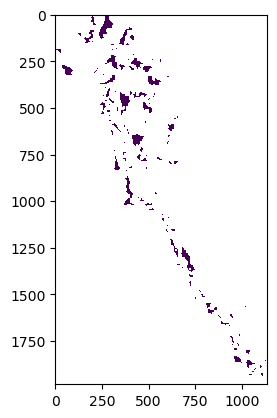

In [8]:
band_ARI = 1/band_20 - 1/band_37
plt.imshow(band_ARI)
plt.show()

In [9]:
band_ARI.max()

2747864014576.2974

## Atmospheric Resistant Vegetation Index (ARVI)
(864 - [660 - 1.5 * (470 - 660)]) / (864 + [660 - 1.5 * (470 - 660)]) --> (band_52 - (band_32 - 1.5 * (band_9 - band_32))) / (band_52 + (band_32 - 1.5 * (band_9 - band_32)))

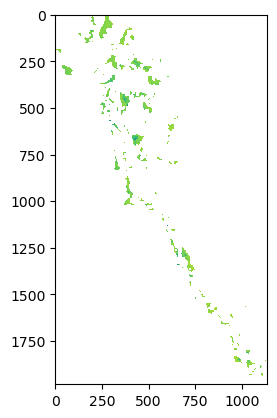

In [10]:
# Read the bands
band_52 = raster_Sel.read(52)
band_52 = np.ma.masked_array(band_52, mask = (band_52 == 0))
band_32 = raster_Sel.read(32)
band_32 = np.ma.masked_array(band_32, mask = (band_32 == 0))
band_9 = raster_Sel.read(9)
band_9 = np.ma.masked_array(band_9, mask = (band_9 == 0))
# Calculation based on the formula
band_ARVI = (band_52 - (band_32 - 1.5 * (band_9 - band_32))) / (band_52 + (band_32 - 1.5 * (band_9 - band_32)))
# Plot to check if any obvious anomaly
plt.imshow(band_ARVI)
plt.show()

## Cellulose Absorption Index (CAI)
100 * (0.5 * (p2032 + p2213) - p2102) --> 100 * (0.5 * (band_169 + band_191) - band_177)

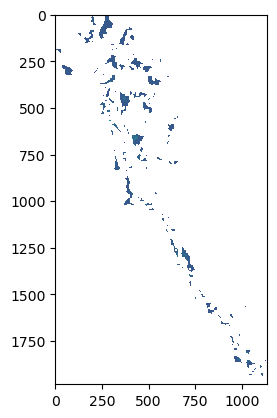

In [11]:
# Read the bands (Mask the pixels where there are non values or zero)
band_169 = raster_Sel.read(169)
band_169 = np.ma.masked_array(band_169, mask = (band_169 == 0))
band_191 = raster_Sel.read(191)
band_191 = np.ma.masked_array(band_191, mask = (band_191 == 0))
band_177 = raster_Sel.read(177)
band_177 = np.ma.masked_array(band_177, mask = (band_177 == 0))
# Calculation based on the formula
band_CAI = 100 * (0.5 * (band_169 + band_191) - band_177)
# Plot to check if any obvious anomaly
plt.imshow(band_CAI)
plt.show()

## Carotenoid Reflectance Index (CRI)
(1/p510) - (1/p550) --> (1/band_15) - (1/band_20)

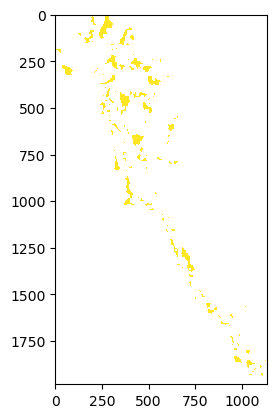

In [12]:
# Read the bands (Mask the pixels where there are non values or zero)
band_15 = raster_Sel.read(15)
band_15 = np.ma.masked_array(band_15, mask = (band_15 == 0))
band_20 = raster_Sel.read(20)
band_20 = np.ma.masked_array(band_20, mask = (band_20 == 0))
# Calculation based on the formula
band_CRI = (1/band_15) - (1/band_20)
# Plot to check if any obvious anomaly
plt.imshow(band_CRI)
plt.show()

## Enhanced Vegetation Index (EVI)
2.5 * (p864 - p660) / (p864 + 6 * p660 - 7.5 * p487 + 1)   
2.5 * (band_52 - band_32) / (band_52 + 6 * band_32 - 7.5 * band_12 + 1)

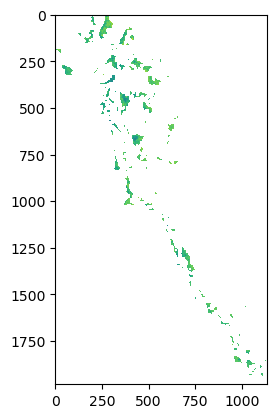

In [13]:
# Read the bands (Mask the pixels where there are non values or zero)
band_12 = raster_Sel.read(12)
band_12 = np.ma.masked_array(band_12, mask = (band_12 == 0))
band_32 = raster_Sel.read(32)
band_32 = np.ma.masked_array(band_32, mask = (band_32 == 0))
band_52 = raster_Sel.read(52)
band_52 = np.ma.masked_array(band_52, mask = (band_52 == 0))
# Calculation based on the formula
band_EVI = 2.5 * (band_52 - band_32) / (band_52 + 6 * band_32 - 7.5 * band_12 + 1)
# Plot to check if any obvious anomaly
plt.imshow(band_EVI)
plt.show()

## Inverted Red-Edge Chlorophyll Index (IRECI)
(p783 - p665) / (p705 - p740)   
(band_45 - band_33) / (band_37 - band_41)   

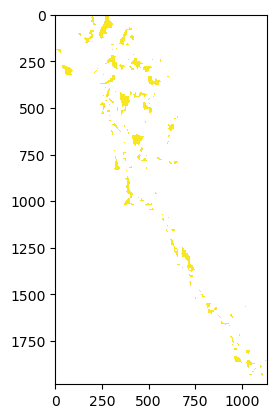

In [14]:
# Read the bands (Mask the pixels where there are non values or zero)
band_45 = raster_Sel.read(45)
band_45 = np.ma.masked_array(band_45, mask = (band_45 == 0))
band_33 = raster_Sel.read(33)
band_33 = np.ma.masked_array(band_33, mask = (band_33 == 0))
band_37 = raster_Sel.read(37)
band_37 = np.ma.masked_array(band_37, mask = (band_37 == 0))
band_41 = raster_Sel.read(41)
band_41 = np.ma.masked_array(band_41, mask = (band_41 == 0))
# Calculation based on the formula
band_IRECI = (band_45 - band_33) / (band_37 - band_41)   
# Plot to check if any obvious anomaly
plt.imshow(band_IRECI)
plt.show()

## Modified Chlorophyll Absorption Ratio Index (MCARI)
((p701 - p671) - 0.2 * (p701 - p549)) * (p701 / p671)  
((band_37 - band_34) - 0.2 * (band_37 - band_20)) * (band_37 / band_34)  

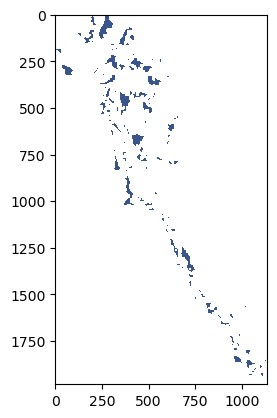

In [15]:
# Read the bands (Mask the pixels where there are non values or zero)
band_34 = raster_Sel.read(34)
band_34 = np.ma.masked_array(band_34, mask = (band_34 == 0))
# Calculation based on the formula
band_MCARI = ((band_37 - band_34) - 0.2 * (band_37 - band_20)) * (band_37 / band_34)  
# Plot to check if any obvious anomaly
plt.imshow(band_MCARI)
plt.show()

## Moisture Stress Index (MSI)
p1598 / p823
band_122 / band_49

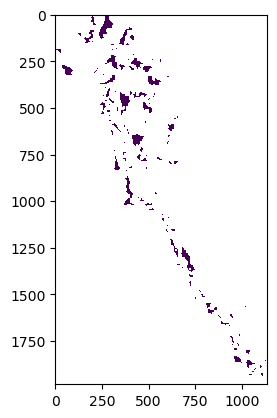

In [16]:
# Read the bands (Mask the pixels where there are non values or zero)
band_122 = raster_Sel.read(122)
band_122 = np.ma.masked_array(band_122, mask = (band_122 == 0))
band_49 = raster_Sel.read(49)
band_49 = np.ma.masked_array(band_49, mask = (band_49 == 0))
# Calculation based on the formula
band_MSI = band_122 / band_49
# Plot to check if any obvious anomaly
plt.imshow(band_MSI)
plt.show()

## Normalized Difference Infrared Index (NDII)
(p823 - p1649) / (p823 + p1649)  
(band_49 - band_127) / (band_49 + band_127)

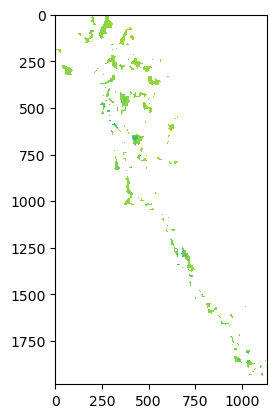

In [17]:
# Read the bands (Mask the pixels where there are non values or zero)
band_127 = raster_Sel.read(127)
band_127 = np.ma.masked_array(band_127, mask = (band_127 == 0))
# Calculation based on the formula
band_NDII = (band_49 - band_127) / (band_49 + band_127)
# Plot to check if any obvious anomaly
plt.imshow(band_NDII)
plt.show()

## Normalized Difference Lignin Index (NDLI)
(log(1/p1754) - log(1/p1680)) / (log(1/p1754) + log(1/p1680))  
(log(1/band_138) - log(1/band_130)) / (log(1/band_138) + log(1/band_130))  

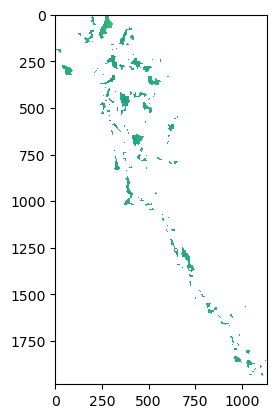

In [18]:
# Read the bands (Mask the pixels where there are non values or zero)
band_138 = raster_Sel.read(138)
band_138 = np.ma.masked_array(band_138, mask = (band_138 == 0))
band_130 = raster_Sel.read(130)
band_130 = np.ma.masked_array(band_130, mask = (band_130 == 0))
# Calculation based on the formula
band_NDLI_top = np.log(1/band_138) - np.log(1/band_130)
band_NDLI_top = np.ma.masked_array(band_NDLI_top, mask = (band_NDLI_top == 0))
band_NDLI_bot = np.log(1/band_138) + np.log(1/band_130)
band_NDLI_bot = np.ma.masked_array(band_NDLI_bot, mask = (band_NDLI_bot == 0))
band_NDLI = band_NDLI_top / band_NDLI_bot  
# Plot to check if any obvious anomaly
plt.imshow(band_NDLI)
plt.show()

## Normalized Difference Vegetation Index (NDVI)
(p864 - p660) / (p864 + p660)  
(band_52 - band_32) / (band_52 + band_32)  

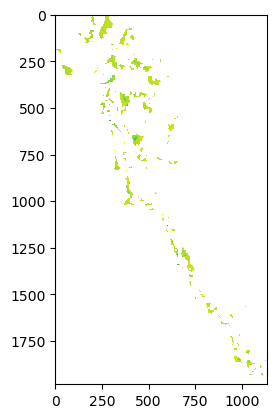

In [19]:
# Calculation based on the formula
band_NDVI = (band_52 - band_32) / (band_52 + band_32)  
# Plot to check if any obvious anomaly
plt.imshow(band_NDVI)
plt.show()

## Normalized Difference Water Index (NDWI)
(p854 - p1245) / (p860 + p660)  
(band_51 - band_89) / (band_52 + band_32)  

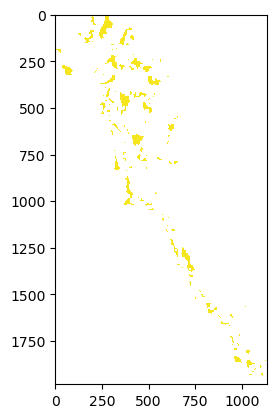

In [20]:
# Read the bands (Mask the pixels where there are non values or zero)
band_51 = raster_Sel.read(51)
band_51 = np.ma.masked_array(band_51, mask = (band_51 == 0))
band_89 = raster_Sel.read(89)
band_89 = np.ma.masked_array(band_89, mask = (band_89 == 0))
# Calculation based on the formula
band_NDWI = (band_51 - band_89) / (band_52 + band_32)  
# Plot to check if any obvious anomaly
plt.imshow(band_NDWI)
plt.show()

## Optimized Soil-Adjusted Vegetation Index (OSAVI)
(1 + 0.16) * (p800 - p670) / (p800 + p670 + 0.16)  
(1 + 0.16) * (band_46 - band_34) / (band_46 + band_34 + 0.16)  

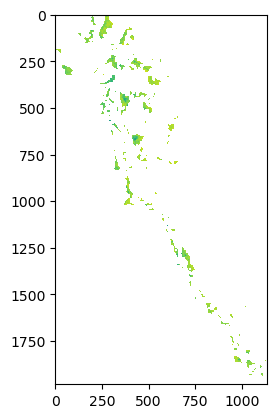

In [21]:
# Read the bands (Mask the pixels where there are non values or zero)
band_46 = raster_Sel.read(46)
band_46 = np.ma.masked_array(band_46, mask = (band_46 == 0))
# Calculation based on the formula
band_OSAVI = (1 + 0.16) * (band_46 - band_34) / (band_46 + band_34 + 0.16)  
# Plot to check if any obvious anomaly
plt.imshow(band_OSAVI)
plt.show()

## Photochemical Reflectance Index (PRI)
(p529 - p569) / (p529 + p569)  
(band_17 - band_22) / (band_17 + band_22)  

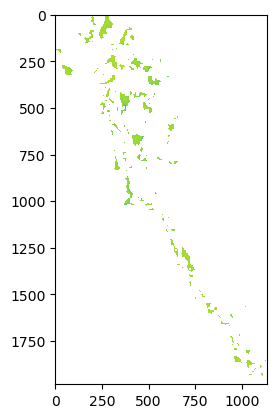

In [22]:
# Read the bands (Mask the pixels where there are non values or zero)
band_17 = raster_Sel.read(17)
band_17 = np.ma.masked_array(band_17, mask = (band_17 == 0))
band_22 = raster_Sel.read(22)
band_22 = np.ma.masked_array(band_22, mask = (band_22 == 0))
# Calculation based on the formula
band_PRI = (band_17 - band_22) / (band_17 + band_22)  
# Plot to check if any obvious anomaly
plt.imshow(band_PRI)
plt.show()

## Plant Senescence Reflectance Index (PSRI)
(p681 - p498) / p752  
(band_35 - band_13) / band_42  

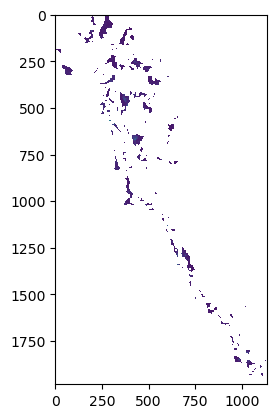

In [23]:
# Read the bands (Mask the pixels where there are non values or zero)
band_35 = raster_Sel.read(35)
band_35 = np.ma.masked_array(band_35, mask = (band_35 == 0))
band_13 = raster_Sel.read(13)
band_13 = np.ma.masked_array(band_13, mask = (band_13 == 0))
band_42 = raster_Sel.read(42)
band_42 = np.ma.masked_array(band_42, mask = (band_42 == 0))
# Calculation based on the formula
band_PSRI = (band_35 - band_13) / band_42  
# Plot to check if any obvious anomaly
plt.imshow(band_PSRI)
plt.show()

## Red Edge Normalized Difference Vegetation Index (RENDVI)
(p752 - p701) / (p752 + p701)  
(band_42 - band_37) / (band_42 + band_37)  

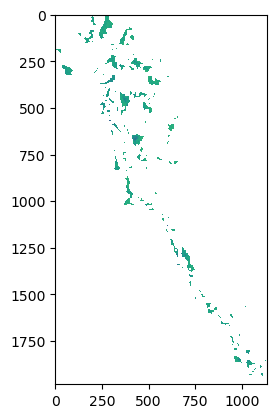

In [24]:
# Calculation based on the formula
band_RENDVI = (band_42 - band_37) / (band_42 + band_37)  
# Plot to check if any obvious anomaly
plt.imshow(band_RENDVI)
plt.show()

## Red Edge Position (REP)
(705 + 35 * (p783 + p665) / 2 - p705) / (p740 - p705)  
(705 + 35 * (band_45 + band_33) / 2 - band_37) / (band_41 - band_37)  

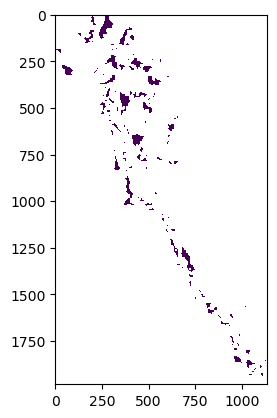

In [25]:
# Calculation based on the formula
band_REP = (705 + 35 * (band_45 + band_33) / 2 - band_37) / (band_41 - band_37)  
# Plot to check if any obvious anomaly
plt.imshow(band_REP)
plt.show()

## Red Green Ratio (RG)
p672 / p555  
band_34 / band_20

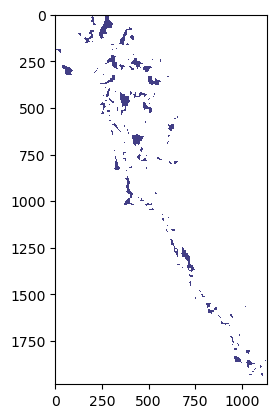

In [26]:
# Calculation based on the formula
band_RG = band_34 / band_20
# Plot to check if any obvious anomaly
plt.imshow(band_RG)
plt.show()

## Soil Adjusted Total Vegetation Index (SATVI)
(p1650 - p680) / (p1650 + p680 + 0.5)
(band_127 - band_35) / (band_127 + band_35 + 0.5)

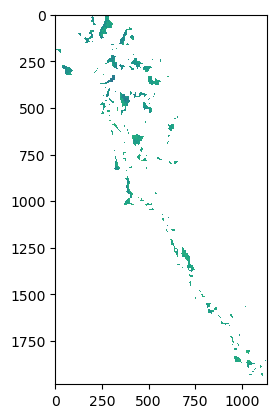

In [27]:
# Calculation based on the formula
band_SATVI = (band_127 - band_35) / (band_127 + band_35 + 0.5)
# Plot to check if any obvious anomaly
plt.imshow(band_SATVI)
plt.show()

## Simple Ratio 1060
p1060 / p1640  
band_72 / band_126

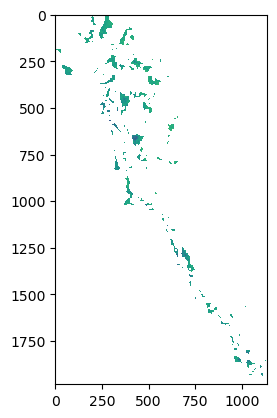

In [28]:
# Read the bands (Mask the pixels where there are non values or zero)
band_72 = raster_Sel.read(72)
band_72 = np.ma.masked_array(band_72, mask = (band_72 == 0))
band_126 = raster_Sel.read(126)
band_126 = np.ma.masked_array(band_126, mask = (band_126 == 0))
# Calculation based on the formula
band_SR1060 = band_72 / band_126
# Plot to check if any obvious anomaly
plt.imshow(band_SR1060)
plt.show()

## Structure Insensitive Pigment Index (SIPI)
(p803 - p467) / (p803 + p681)   
(band_47 - band_9) / (band_47 + band_35)

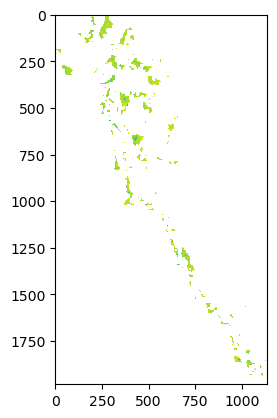

In [29]:
# Read the bands (Mask the pixels where there are non values or zero)
band_9 = raster_Sel.read(9)
band_9 = np.ma.masked_array(band_9, mask = (band_9 == 0))
band_47 = raster_Sel.read(47)
band_47 = np.ma.masked_array(band_47, mask = (band_47 == 0))
# Calculation based on the formula
band_SIPI = (band_47 - band_9) / (band_47 + band_35)
# Plot to check if any obvious anomaly
plt.imshow(band_SIPI)
plt.show()

## Simple Ratio SRNIR
p864 / p660   
band_52 / band_32     

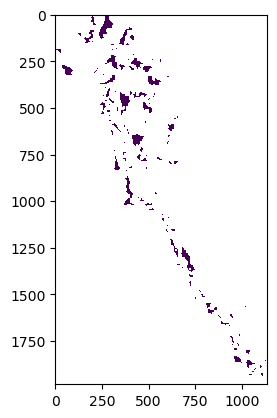

In [30]:
# Calculation based on the formula
band_SRNIR = band_52 / band_32  
# Plot to check if any obvious anomaly
plt.imshow(band_SRNIR)
plt.show()   

## Short Wave Infrared Ratio (SWIR)
p2105 / p1630   
band_177 / band_125   

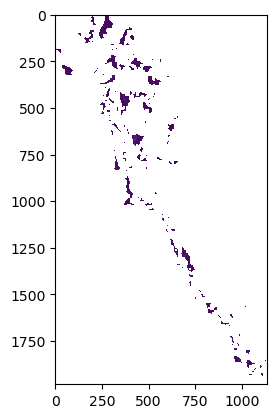

In [31]:
# Read the bands (Mask the pixels where there are non values or zero)
band_125 = raster_Sel.read(125)
band_125 = np.ma.masked_array(band_125, mask = (band_125 == 0))
# Calculation based on the formula
band_SWIR = band_177 / band_125
# Plot to check if any obvious anomaly
plt.imshow(band_SWIR)
plt.show()

## Transformed Chlorophyll Absorption Ration Index (TCARI)
3 * ((p700 - p670) - 0.2 * (p700 - p550) * (p700 / p670))  
3 * ((band_37 - band_34) - 0.2 * (band_37 - band_20) * (band_37 / band_34))

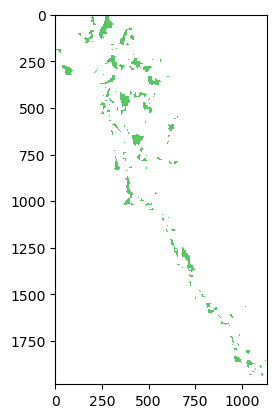

In [32]:
# Calculation based on the formula
band_TCARI = 3 * ((band_37 - band_34) - 0.2 * (band_37 - band_20) * (band_37 / band_34))
# Plot to check if any obvious anomaly
plt.imshow(band_TCARI)
plt.show()

## Visible Atmospherically Resistance Index (VARI)
(p559 - p640) / (p559 + p640 - p467)    
(band_21 - band_30) / (band_21 + band_30 - band_9)    

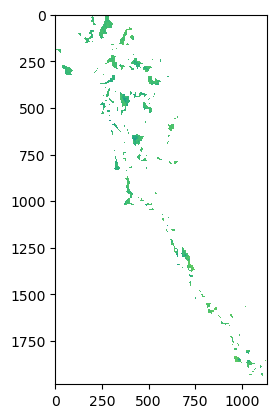

In [33]:
# Read the bands (Mask the pixels where there are non values or zero)
band_21 = raster_Sel.read(21)
band_21 = np.ma.masked_array(band_21, mask = (band_21 == 0))
band_30 = raster_Sel.read(30)
band_30 = np.ma.masked_array(band_30, mask = (band_30 == 0))
# Calculation based on the formula
band_VARI = (band_21 - band_30) / (band_21 + band_30 - band_9)    
# Plot to check if any obvious anomaly
plt.imshow(band_VARI)
plt.show()

## Visible Green Index (Vigreen)
(p559 - p660) / (p559 + p660)    
(band_21 - band_32) / (band_21 + band_32)    

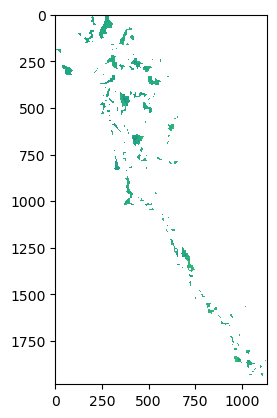

In [34]:
# Calculation based on the formula
band_Vigreen = (band_21 - band_32) / (band_21 + band_32)    
# Plot to check if any obvious anomaly
plt.imshow(band_Vigreen)
plt.show()

## Vogelmann Red Edge Index (VOG)
p742 / p722   
band_41 / band_39   

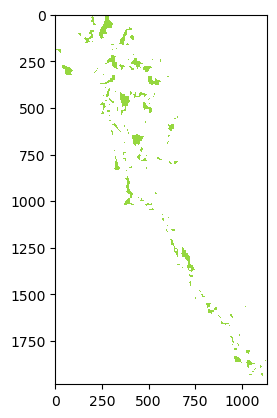

In [35]:
# Read the bands (Mask the pixels where there are non values or zero)
band_39 = raster_Sel.read(39)
band_39 = np.ma.masked_array(band_39, mask = (band_39 == 0))
# Calculation based on the formula
band_VOG = band_41 / band_39    
# Plot to check if any obvious anomaly
plt.imshow(band_VOG)
plt.show()

## Water Band Index (WBI)
p905 / p972   
band_56 / band_63   

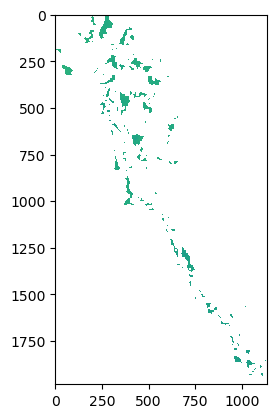

In [36]:
# Read the bands (Mask the pixels where there are non values or zero)
band_56 = raster_Sel.read(56)
band_56 = np.ma.masked_array(band_56, mask = (band_56 == 0))
band_63 = raster_Sel.read(63)
band_63 = np.ma.masked_array(band_63, mask = (band_63 == 0))
# Calculation based on the formula
band_WBI = band_56 / band_63    
# Plot to check if any obvious anomaly
plt.imshow(band_WBI)
plt.show() 

# Stack all these indices! 

In [247]:
band_Indices = [band_ARI, band_ARVI, band_CAI, band_CRI, band_EVI, band_IRECI, band_MCARI, band_MSI, band_NDII, band_NDLI, band_NDVI, band_NDWI, band_OSAVI, band_PRI, band_PSRI, band_RENDVI, band_REP, band_RG, band_SATVI, band_SR1060, band_SIPI, band_SRNIR, band_SWIR, band_TCARI, band_VARI, band_Vigreen, band_VOG, band_WBI]
band_Indices_Name = ['Anthocyanin Reflectance Index (ARI)', 'Atmospheric Resistant Vegetation Index (ARVI)', 'Cellulose Absorption Index (CAI)', 'Carotenoid Reflectance Index (CRI)', 'Enhanced Vegetation Index (EVI)', 'Inverted Red-Edge Chlorophyll Index (IRECI)', 'Modified Chlorophyll Absorption Ratio Index (MCARI)', 'Moisture Stress Index (MSI)', 'Normalized Difference Infrared Index (NDII)', 'Normalized Difference Lignin Index (NDLI)', 'Normalized Difference Vegetation Index (NDVI)', 'Normalized Difference Water Index (NDWI)', 'Optimized Soil-Adjusted Vegetation Index (OSAVI)', 'Photochemical Reflectance Index (PRI)', 'Plant Senescence Reflectance Index (PSRI)', 'Red Edge Normalized Difference Vegetation Index (RENDVI)', 'Red Edge Position (REP)', 'Red Green Ratio (RG)', 'Soil Adjusted Total Vegetation Index (SATVI)', 'Simple Ratio 1060', 'Structure Insensitive Pigment Index (SIPI)', 'Simple Ratio SRNIR', 'Short Wave Infrared Ratio (SWIR)', 'Transformed Chlorophyll Absorption Ration Index (TCARI)', 'Visible Atmospherically Resistance Index (VARI)', 'Visible Green Index (Vigreen)', 'Vogelmann Red Edge Index (VOG)', 'Water Band Index (WBI)']
len(band_Indices_Name)

28

In [248]:
band_Indices_NoMask = []
for band in band_Indices:
    a = band.data
    b = band.mask
    a[np.where(b)] = np.nan
    band_Indices_NoMask.append(a)
band_Indices_NoMask[0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [249]:
# meta data correction
out_meta = raster_Sel.meta.copy()
out_meta.update({"count": 28,
                })

In [250]:
with rio.open(cwd_PRISMA_Indices + "\\" + raster_Names[1] + "_StackedIndices_Cropped", 'w', **out_meta) as dest:
    for band_nr, src in enumerate(band_Indices_NoMask, start=1):
        dest.write(src, band_nr)
    dest.descriptions = tuple(band_Indices_Name)

### Stack selected indices! 

In [37]:
band_Indices_Sel = [band_ARI, band_ARVI, band_EVI, band_MCARI, band_MSI, band_NDII, band_NDVI, band_NDWI, band_OSAVI, band_RENDVI, band_REP, band_RG, band_SATVI, band_SR1060, band_SIPI, band_SRNIR, band_TCARI, band_VARI, band_Vigreen, band_VOG]
band_Indices_Name_Sel = ['Anthocyanin Reflectance Index (ARI)', 'Atmospheric Resistant Vegetation Index (ARVI)', 'Enhanced Vegetation Index (EVI)', 'Modified Chlorophyll Absorption Ratio Index (MCARI)', 'Moisture Stress Index (MSI)', 'Normalized Difference Infrared Index (NDII)', 'Normalized Difference Vegetation Index (NDVI)', 'Normalized Difference Water Index (NDWI)', 'Optimized Soil-Adjusted Vegetation Index (OSAVI)', 'Red Edge Normalized Difference Vegetation Index (RENDVI)', 'Red Edge Position (REP)', 'Red Green Ratio (RG)', 'Soil Adjusted Total Vegetation Index (SATVI)', 'Simple Ratio 1060', 'Structure Insensitive Pigment Index (SIPI)', 'Simple Ratio SRNIR', 'Transformed Chlorophyll Absorption Ration Index (TCARI)', 'Visible Atmospherically Resistance Index (VARI)', 'Visible Green Index (Vigreen)', 'Vogelmann Red Edge Index (VOG)']
len(band_Indices_Name_Sel)

20

In [38]:
band_Indices_NoMask_Sel = []
for band in band_Indices_Sel:
    a = band.data
    b = band.mask
    a[np.where(b)] = np.nan
    band_Indices_NoMask_Sel.append(a)
band_Indices_NoMask_Sel[0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [39]:
# meta data correction
out_meta = raster_Sel.meta.copy()
out_meta.update({"count": len(band_Indices_Name_Sel),
                })

In [43]:
with rio.open(cwd_PRISMA_Indices + "\\Sel\\" + raster_Names_Sel + "_StackedIndices_Cropped_20VI", 'w', **out_meta) as dest:
    for band_nr, src in enumerate(band_Indices_NoMask_Sel, start=1):
        dest.write(src, band_nr)
    dest.descriptions = tuple(band_Indices_Name_Sel)